# Apache Spark
<h3> Vinit Shah</h3>

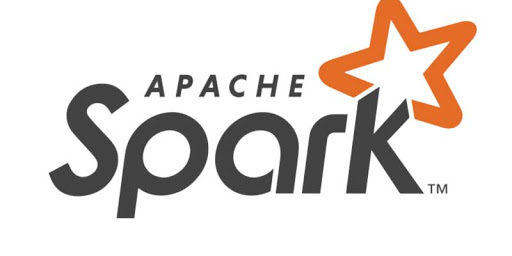

* Open-source unified analytics engine for large-scale data processing.
* Provides an interface for programming entire clusters with implicit data parallelism and fault tolerance.
* Started as a research project at the UC Berkeley AMPLab in 2009, and was open sourced in early 2010.

# Motivation

## MapReduce

* Scalable processing engine of the Hadoop ecosystem
* Disk-based data processing framework (HDFS files)
* Data is reloaded from disk with every query → Costly I/O	
* Persists intermediate results to disk
* Costly I/O → Not appropriate for iterative or stream processing workloads<
* Best for ETL like workloads (batch processing)

## Spark

* Memory based data processing framework
* Avoids costly I/O by keeping intermediate results in memory
* Leverages distributed memory and remembers operations applied to dataset
* Data locality based computation → High Performance
* Best for both iterative (or stream processing) and batch workloads

## Spark Architecture

* Driver program: The process running the main() function of the application and creating the SparkContext
* Cluster manager: An external service for acquiring resources on the cluster (e.g. standalone manager, Mesos, YARN)
* Worker node: Any node that can run application code in the cluster
* Executor: A process launched for an application on a worker node, that runs tasks and keeps data in memory or disk storage across them.
* Task: A unit of work that will be sent to one executor

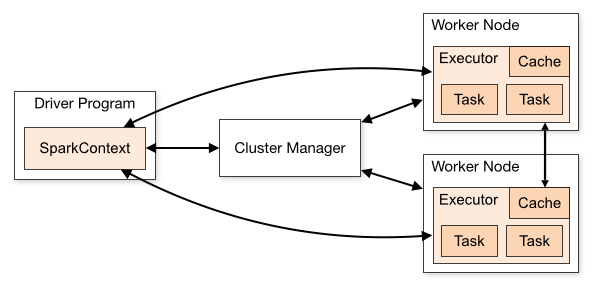

## Spark Ecosystem

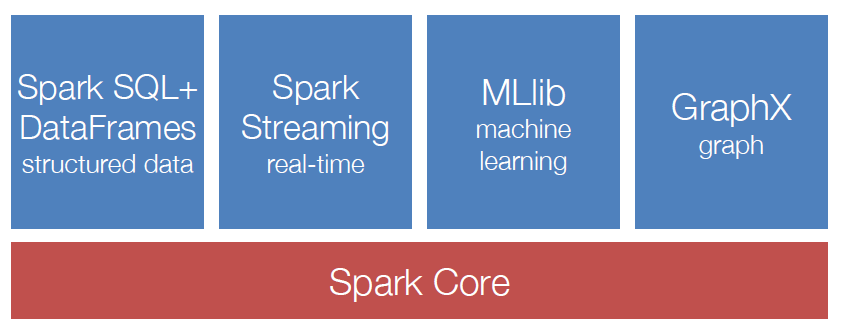

### Spark RDD

* Resilient Distributed Datasets (RDD) are the primary abstraction in Spark.
* Fault-tolerant collection of elements that can be operated on in parallel.
* 2 types of operations on RDDs: <b>Transformations and Actions</b>
* Transformations are lazy (not computed immediately)
* Transformed RDD gets recomputed when an action is run on it (default)
* RDD's can be persisted into storage in memory or disk
* Spark can create RDDs from any file stored in HDFS, local file system, Amazon S3, Hypertable, HBase, etc.


### Lazy Evaluation:
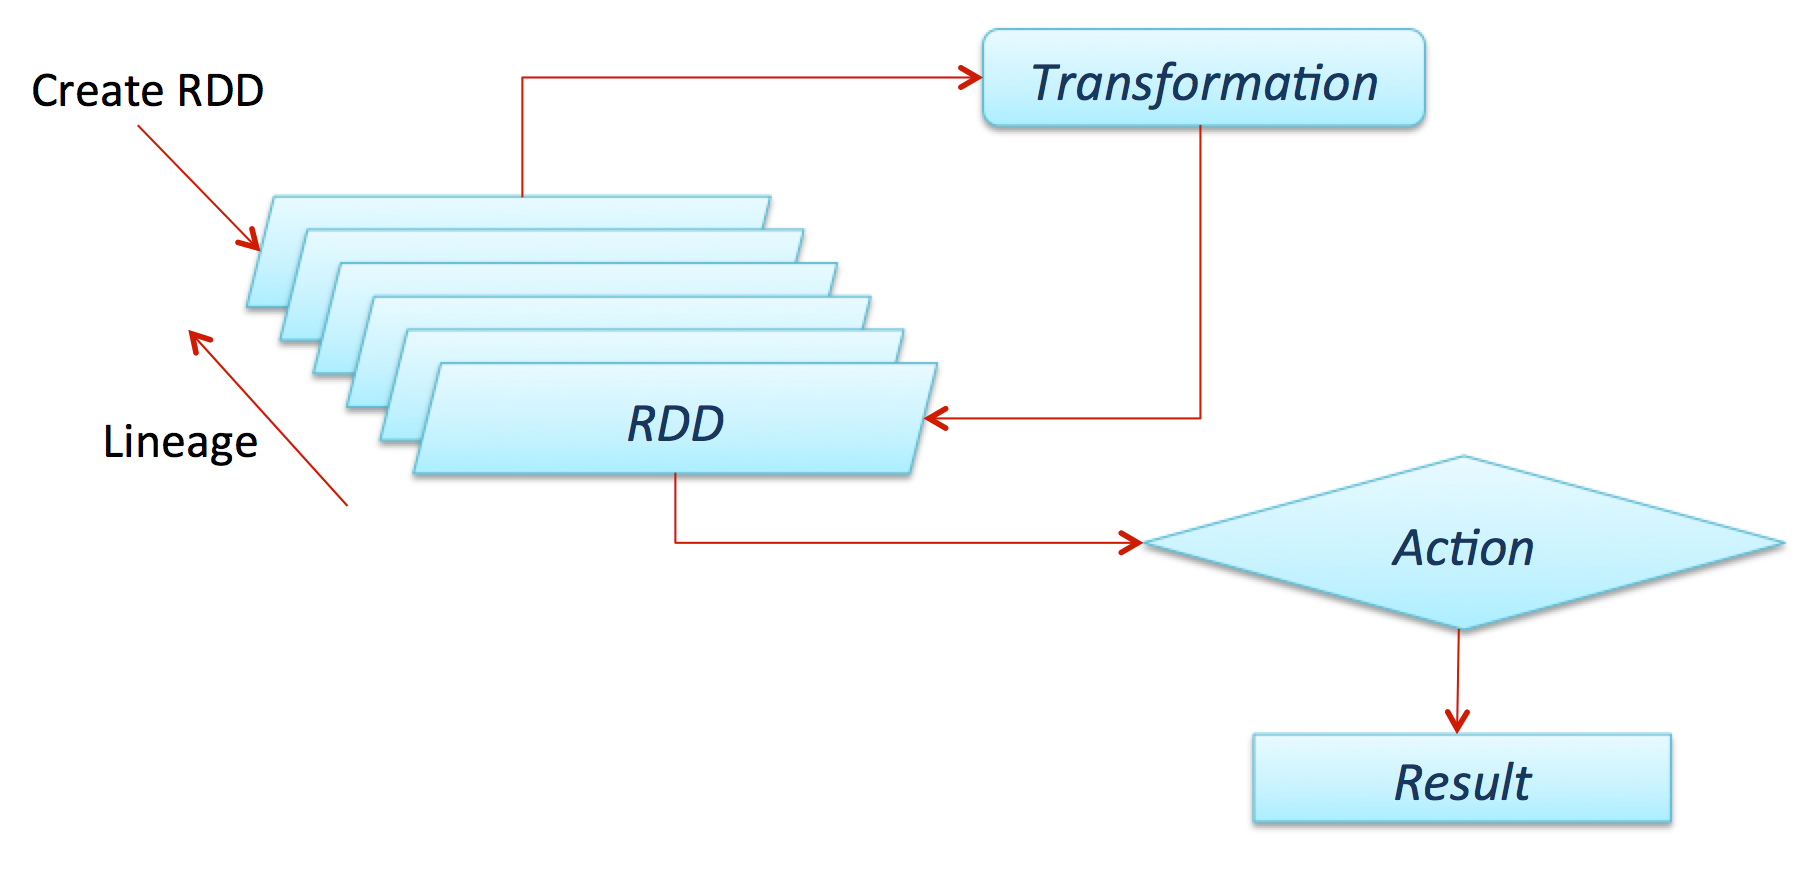

### SparkSQL

* Module for working with structured and semi-structured data
* It originated to overcome the limitations of Apache Hive lags in performance as it uses MapReduce jobs for executing ad-hoc queries.
* Performs better than Hive in most scenarios

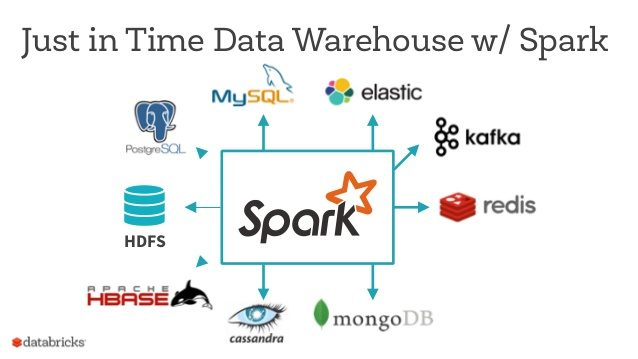

### Spark MLlib

* Provides tools for classification, regression, clustering, and collaborative filtering feature extraction, transformation, dimensionality reduction.
* Also provides selection tools for constructing, evaluating, and tuning ML pipelines.

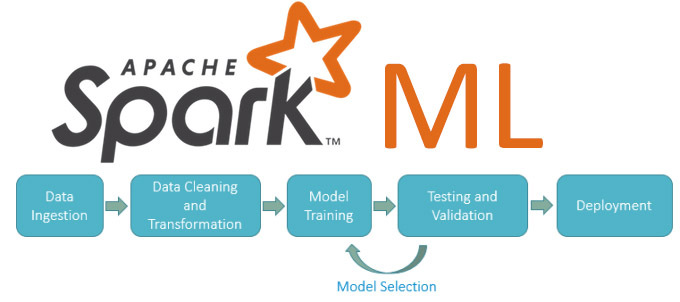

### Spark Streaming

* Extends the core API to allow high-throughput, fault-tolerant stream processing of live data streams.
* Data can be ingested from many sources: Kafka, Flume, Twitter, ZeroMQ, TCP sockets, etc.
* Results can be pushed out to filesystems, databases, live dashboards, etc.
* Spark’s built-in machine learning algorithms and graph processing algorithms can be applied to data streams.

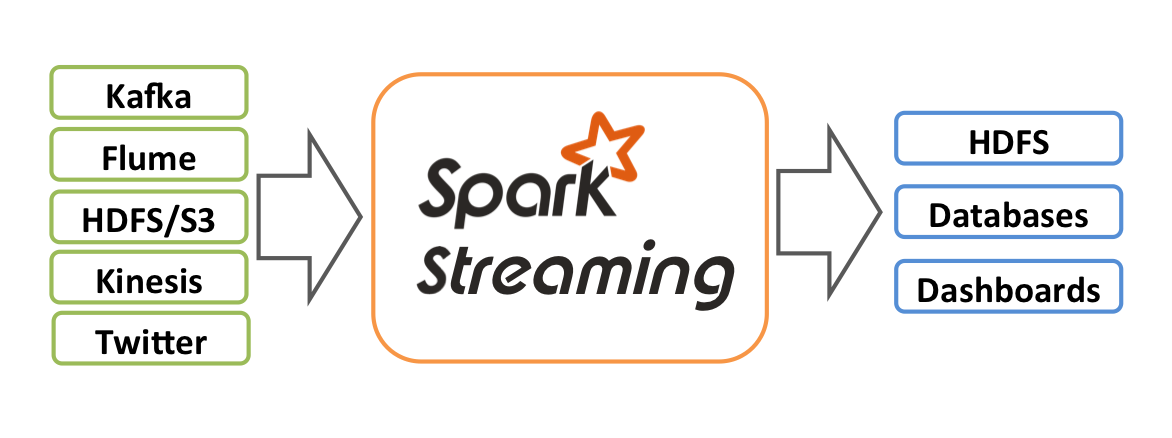

## Use Case:
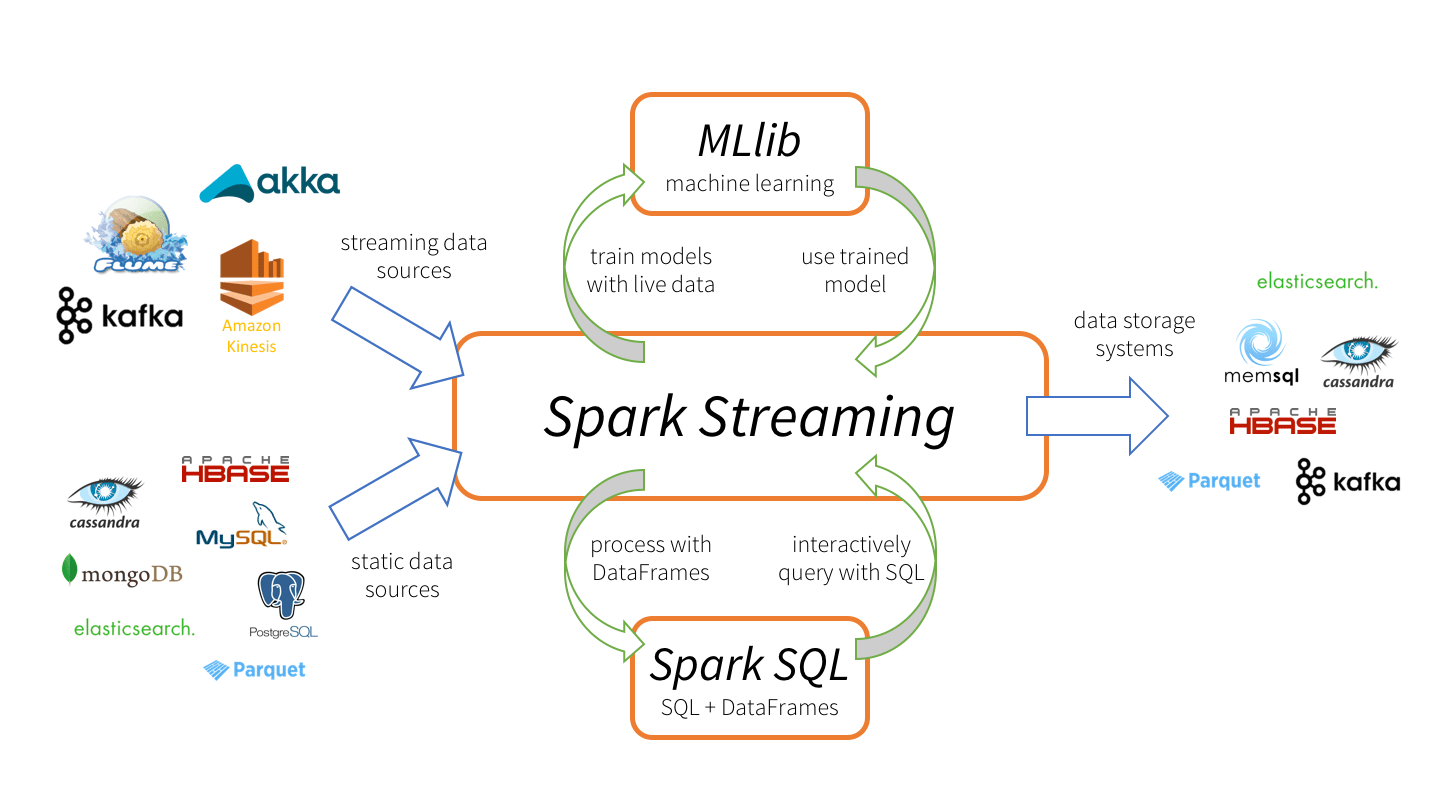

In [1]:
import findspark
findspark.init()
findspark.find()

'C:\\Code\\Hadoop-Setup\\Spark-3.0'

In [2]:
import pyspark

## Spark RDD

In [7]:
from pyspark import SparkContext

# Create Spark Context
sc = SparkContext("local", "WordCount App")

# Open text file
text_file = sc.textFile("data/word_count.txt")

# Transformations
word_count = text_file \
            .flatMap(lambda line: line.split(" ")) \
            .map(lambda word: (word, 1)) \
            .reduceByKey(lambda a, b: a + b)

# Action
result = word_count.collect()

# Result
for item in result:
    print(item)

# Save result as text file
# result.saveAsTextFile("output/word_count")

# End the Spark context
sc.stop()

('Lorem', 2)
('Ipsum', 2)
('is', 1)
('simply', 1)
('dummy', 2)
('text', 2)
('of', 2)
('the', 3)
('printing', 1)
('and', 2)
('typesetting', 1)
('industry.', 1)
('has', 1)
('been', 1)
("industry's", 1)
('standard', 1)
('ever', 1)
('since', 1)
('1500s,', 1)
('when', 1)
('an', 1)
('unknown', 1)
('printer', 1)
('took', 1)
('a', 2)
('galley', 1)
('type', 2)
('scrambled', 1)
('it', 1)
('to', 1)
('make', 1)
('specimen', 1)
('book.', 1)


## Spark SQL

In [8]:
from pyspark.sql import SparkSession

# Create Spark Session
spark = SparkSession.builder.appName("Titanic App").getOrCreate()

# Read CSV file
df = spark.read \
        .option("delimiter", ",") \
        .option("inferSchema", "true") \
        .option("header", "true") \
        .csv("data/titanic.csv")

# Drop the row if all values are null
df.na.drop("all")

df.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|      

In [9]:
from pyspark.sql import functions as F

# Select Max value from Fare column
df.select(F.max("Fare")).show(truncate=False)

+---------+
|max(Fare)|
+---------+
|512.3292 |
+---------+



In [11]:
# Create a Temp View for the dataset
df.createOrReplaceTempView("titanic")

# Query the table
spark.sql("SELECT Age, Sex, Fare FROM titanic WHERE Survived = 1").show()

+----+------+--------+
| Age|   Sex|    Fare|
+----+------+--------+
|38.0|female| 71.2833|
|26.0|female|   7.925|
|35.0|female|    53.1|
|27.0|female| 11.1333|
|14.0|female| 30.0708|
| 4.0|female|    16.7|
|58.0|female|   26.55|
|55.0|female|    16.0|
|null|  male|    13.0|
|null|female|   7.225|
|34.0|  male|    13.0|
|15.0|female|  8.0292|
|28.0|  male|    35.5|
|38.0|female| 31.3875|
|null|female|  7.8792|
|null|female|146.5208|
|null|female|    7.75|
|null|  male|  7.2292|
|14.0|female| 11.2417|
| 3.0|female| 41.5792|
+----+------+--------+
only showing top 20 rows



In [12]:
# Partition the data by Survived column and export the data in parquet file format
df.write.partitionBy("Survived").parquet("output/parquet")

# Partition the data by Survived column and export the data to a Hive table
df.write.partitionBy("Survived").format("hive").saveAsTable("titanic_partition_table")

# Stop the Spark Session
spark.stop()